In [3]:
# All the libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the data and checking the same
digt_recgzr = pd.read_csv("train.csv")
digt_recgzr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digt_recgzr.shape

(42000, 785)

<b>20% of the data is used for training the model as suggested in order to reduce the processing time</b>

In [6]:
digt_recgzr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


 <b>Describe was not done here as in every assignment as I feel that there would be no inferences that could be drawn from it</b>

In [7]:
# Columns Check
digt_recgzr.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
digt_recgzr_labl_unq = list (np.sort(digt_recgzr['label'].unique()))
print (digt_recgzr_labl_unq)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<b> Confirmation that there are labels from 0 to 9 only in this data set </b>

In [9]:
#Checking for null values
digt_recgzr.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
# Check Duplicates
digt_recgzr.duplicated().sum()

0

<b> No duplicates </b>

In [11]:
# Pulling 20% from the entire dataset for faster training using test train split
digit_recgzr_train,digit_recgzr_test = train_test_split(digt_recgzr, train_size=0.2, test_size=0.8, random_state=100)

In [12]:
digit_recgzr_train.shape

(8400, 785)

In [13]:
digit_recgzr_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32202,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40863,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18288,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33556,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


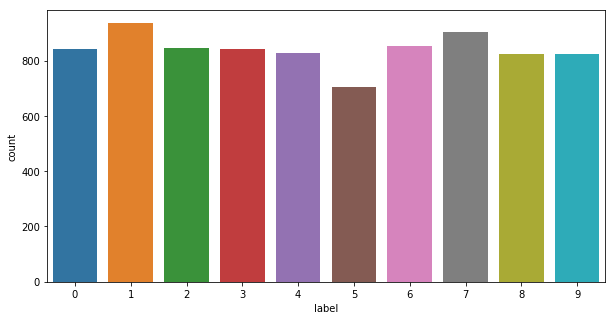

In [14]:
#Cross checking the label value counts
plt.figure(figsize=(10,5))
sns.countplot(digit_recgzr_train['label'])
plt.show()

<b>5 seems to have low variance and there seems to be a bias towards 1 and 7 </b>

In [15]:
#Average values of features
round(digt_recgzr.drop('label', axis = 1).mean(),2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [16]:
digit_recgzr_avg = digit_recgzr_train.groupby('label').mean()
digit_recgzr_avg.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Splitting the train set into the X and Y
X = digit_recgzr_train.drop("label", axis = 1)
y = digit_recgzr_train['label']

In [18]:
# faeture scaling
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 100)

In [19]:
y_train.shape

(5880,)

In [20]:
X_train.shape

(5880, 784)

### Model Building

### Linear Model

In [21]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict the values using the test data
y_pred = model_linear.predict(X_test)


In [22]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred).round(2), "\n")

#confusion matrix 
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.91 

[[212   0   0   0   2   1   2   0   3   0]
 [  0 288   3   0   0   1   1   0   2   0]
 [  8   2 250   2   5   1   3   4   2   0]
 [  1   1  12 229   2  10   1   1   3   6]
 [  0   2   2   0 228   0   1   0   2   3]
 [  2   2   1  16   2 172   2   0   2   2]
 [  1   0   5   0   2   4 245   0   0   0]
 [  0   4   0   3   3   0   0 250   0   4]
 [  2   8   3  10   0  11   4   1 210   1]
 [  0   0   3   2  15   3   0  15   1 213]]


<b> Accuracy is  91% using the linear approach, thus we can infer that the data is inclined towards being linear fasion</b>

<b> Let's try buliding a non-linear model by tuning the hyperparameters</b>

In [23]:
# RBF kernel, value of gamma is default, C=1

non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

y_pred = non_linear_model.predict(X_test)

In [24]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred).round(2), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.93 

[[211   0   1   0   1   2   3   1   1   0]
 [  0 287   4   0   0   1   0   1   2   0]
 [  2   0 263   1   5   0   3   2   1   0]
 [  0   1  12 238   1   2   1   3   4   4]
 [  0   1   3   0 229   1   0   1   0   3]
 [  1   0   3  10   1 180   4   0   0   2]
 [  2   0   4   0   0   7 244   0   0   0]
 [  0   3   8   0   0   0   0 246   0   7]
 [  1   5   4   5   0   8   2   4 219   2]
 [  0   0   5   3   6   0   0   8   1 229]]


<b>The accuracy has grown to 93% which shows non linear has a better edge that the linear ones</b>

In [25]:
# Grid Search: Hyperparameter Tuning

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 3, 5, 10,100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 13.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 3, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [26]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,82.901049,4.637071,10.492700,0.212656,1,0.01,"{'C': 1, 'gamma': 0.01}",0.734694,0.755952,0.737245,...,0.734524,0.013578,15,1.000000,1.000000,1.000000,1.000000,0.999787,0.999957,0.000085
1,23.095272,1.098357,6.594829,0.518180,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926871,0.942177,0.922619,...,0.926020,0.008554,7,0.972151,0.973427,0.977891,0.973852,0.975340,0.974532,0.001964
2,33.046135,2.088371,8.218243,0.450885,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.900510,0.895408,0.898810,...,0.894048,0.005421,10,0.908163,0.912415,0.911565,0.914753,0.913265,0.912032,0.002203
3,91.136162,1.255252,11.574660,0.112094,3,0.01,"{'C': 3, 'gamma': 0.01}",0.752551,0.767857,0.756803,...,0.752041,0.013158,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,22.724024,0.428693,6.569050,0.183922,3,0.001,"{'C': 3, 'gamma': 0.001}",0.926020,0.946429,0.935374,...,0.932483,0.007842,4,0.993197,0.993835,0.994685,0.993622,0.995323,0.994133,0.000768
5,25.700771,0.311560,7.610437,0.040255,3,0.0001,"{'C': 3, 'gamma': 0.0001}",0.919218,0.919218,0.914966,...,0.915476,0.003341,9,0.937713,0.940051,0.941114,0.942815,0.941964,0.940731,0.001765
6,95.694605,2.468431,11.692779,0.449833,5,0.01,"{'C': 5, 'gamma': 0.01}",0.752551,0.767857,0.756803,...,0.752041,0.013158,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,23.423668,0.996400,6.924204,0.446557,5,0.001,"{'C': 5, 'gamma': 0.001}",0.929422,0.944728,0.935374,...,0.935544,0.005028,2,0.997874,0.997874,0.997662,0.998299,0.998087,0.997959,0.000217
8,22.386446,0.705742,7.490702,0.366306,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.924320,0.927721,0.921769,...,0.920748,0.005113,8,0.950893,0.950043,0.953019,0.952168,0.953231,0.951871,0.001229
9,94.958529,1.317980,11.673326,0.120634,10,0.01,"{'C': 10, 'gamma': 0.01}",0.752551,0.767857,0.756803,...,0.752041,0.013158,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


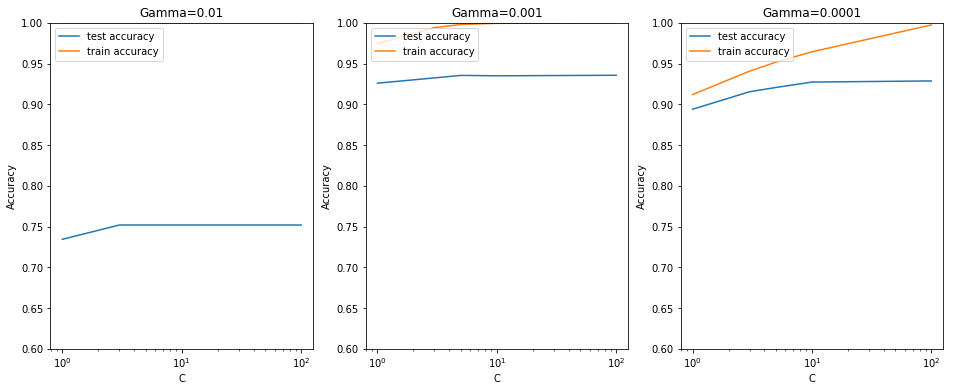

In [27]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

#  plotting
plt.figure(figsize=(16,6))

# subplot 1
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [28]:
# Optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score.round, best_hyperparams))

The best test score is 0.9357142857142857 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


In [38]:
# model with optimal hyperparameters

model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9384920634920635 

[[213   0   1   0   2   0   3   0   1   0]
 [  0 287   3   0   0   0   1   2   2   0]
 [  2   1 262   2   6   0   2   0   2   0]
 [  0   1  11 239   1   3   1   1   3   6]
 [  0   0   3   0 228   2   0   1   1   3]
 [  0   1   1   9   1 188   1   0   0   0]
 [  1   0   4   0   1   4 247   0   0   0]
 [  0   3   5   0   1   0   0 249   0   6]
 [  2   5   4   5   0   5   2   3 223   1]
 [  1   0   5   2   6   0   0   8   1 229]] 



In [39]:
print("precision", metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))

precision 0.9384920634920635
sensitivity/recall 0.9384920634920635


### Poly Kernal

In [36]:
# model with optimal hyperparameters

model = SVC(C=100, gamma=0.001, kernel="poly")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.95 

[[215   0   0   0   1   1   1   0   2   0]
 [  0 288   3   0   0   0   0   1   3   0]
 [  0   0 260   1   5   0   1   0  10   0]
 [  1   1   6 238   2   1   1   2   8   6]
 [  0   0   0   0 232   0   0   0   1   5]
 [  0   0   0   5   1 187   3   0   3   2]
 [  2   0   2   0   4   4 244   0   1   0]
 [  0   1   1   0   3   0   1 253   0   5]
 [  1   0   0   1   0   0   2   2 241   3]
 [  0   0   1   1   7   1   0   5   1 236]] 



In [37]:
print("precision", metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))

precision 0.95
sensitivity/recall 0.95


### Insights post the modelling
> The best model accuracy is achieved using kernel as poly with <br>
> Accuracy - 95% <br> 
> with precison and recall 95% each
> The 2nd best is using RBF Kernel approach <br>
> Accuracy - 93.8% <br>
> with precison and recall 93.8% each
> Using the linear approach we were able to get only 91% of the accuracy <br>
> <b>Hence Poly kernel non-linear approach using gridsearch is the best option in this analysis as it gives 95% accuracy <br></b>